Run locally or <a target="_blank" href="https://colab.research.google.com/github/aalgahmi/dl_handouts/blob/main/03.autodifferentiation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Autodifferentiation

Autodifferentiation, short for automatic differentiation, is a set of techniques used for efficiently and automatically computing the derivatives or gradients of functions. These derivatives are crucial for optimization algorithms, such as gradient descent, which are critical to training machine learning models. It allows for the automatic calculation of derivatives without explicitly deriving and implementing them manually. It is particularly beneficial in scenarios where the functions involved are complex or when dealing with high-dimensional spaces.

There are two main modes of autodifferentiation:

* **Forward-mode autodifferentiation:** Computes the derivatives by applying the chain rule from the input variables to the output. This mode is efficient for functions where the number of input variables is relatively small compared to the number of outputs.

* **Reverse-mode autodifferentiation (backpropagation):** Computes the derivatives by traversing the computational graph backward from the output to the input. This mode is well-suited for functions with many input variables and few outputs, which is often the case in machine learning.

Frameworks like PyTorch and TensorFlow leverage reverse-mode autodifferentiation to enable the automatic computation of gradients during the training of neural networks, making it easier for us to implement and experiment with complex models.

Below are two detailed examples of autodifferentiation:

## Example 1

Given the function:

$$ f(x_1, x_2) = ln(x_1) + x_1 x_2 - sin(x_2) $$


here is the computational graph. Node labels are between `(` and `)`. Notice that: $y = f(x_1, x_2) = v_7$

```
x1 (v1) ------ LN (v3) ------ PLUS (v5) ---------MINUS(v7)
      \                     /                   /
       \                   /                   /
        \                 /                   /
         \               /                   /
          \             /                   /
           \           /                   /
            TIMES (v4)                    /
          /                              /
         /                              / 
        /                              /   
       /                              /
x2 (v2) ------------------------- SIN(v6)            
                       
```

### Forward-mode Autodiff
First, refer to the lecture recording for the calculations of $\frac{\delta y}{\delta v_1} = \frac{\delta v_7}{\delta v_1}$.

For: $$\frac{\delta y}{\delta v_2} = \frac{\delta v_7}{\delta v_2}$$ 

at $x_1 = 2, x_2 = 5$, here are the calculations:

$ \dot{v}_1 = \frac{\delta v_1}{\delta v_2} = 0 $

$ \dot{v}_2 = \frac{\delta v_2}{\delta v_2} = 1 $

$ \dot{v}_3 = \frac{\delta \ln(v_1)}{\delta v_2} = 0 $

$ \dot{v}_4 = \frac{\delta v_1 v_2}{\delta v_2} = v_1 = 2 $

$ \dot{v}_5 = \frac{\delta v_5}{\delta v_2} = \dot{v}_3 \frac{\delta v_5}{\delta v_3}  + \dot{v}_4 \frac{\delta v_5}{\delta v_4} = \dot{v}_3 + \dot{v}_4 = 0 + 2 = 2 $


$ \dot{v}_6 = \frac{\delta \sin(v_2)}{\delta v_2} = \cos(v_2) = \cos(5) = 0.284 $

$ \dot{v}_7 = \frac{\delta v_7}{\delta v_2} = \dot{v}_5 \frac{\delta v_7}{\delta v_5}  - \dot{v}_6 \frac{\delta v_7}{\delta v_6} = \dot{v}_5 - \dot{v}_6 = 2 - 0.284 = 1.1716 $


### Reverse-mode Autodiff
At $x_1 = 2, x_2 = 5$, reverse-mode autodiff allows us to calculate: 

$\dot{v}_1 = \frac{\delta v_7}{\delta v_1}$ and $\dot{v}_2 = \frac{\delta v_7}{\delta v_2}$ in one fell swoop.

Running the forward pass:

$v_1 = 2$, $v_2 = 5$, $v_3 = \ln(2)$, $v_4 = 10$, $v_5 = \ln(2) + 10 $, $v_6 = \sin(5)$, and $v_7 = \ln(2) + 10 - \sin(5)$

$ \dot{v}_7 = \frac{\delta v_7}{\delta v_7} = 1$

$ \dot{v}_6 = \frac{\delta v_7}{\delta v_6} = \frac{\delta v_5 - v_6}{\delta v_6} = -1 $

$ \dot{v}_5 = \frac{\delta v_7}{\delta v_5} = \frac{\delta v_5 - v_6}{\delta v_5} = 1 $

$ \dot{v}_4 = \frac{\delta v_7}{\delta v_4} = \dot{v}_5 \frac{\delta v_3 + v_4}{\delta v_4} = 1 \times 1 = 1 $

$ \dot{v}_3 = \frac{\delta v_7}{\delta v_3} = \dot{v}_5 \frac{\delta v_3 + v_4}{\delta v_3} = 1 \times 1 = 1 $

$ \dot{v}_2 = \frac{\delta v_7}{\delta v_2} = \dot{v}_4 \frac{\delta v_1 v_2}{\delta v_2} + \dot{v}_6 \frac{\delta \sin(v_2)}{\delta v_2} =  1 \times v_1 + (-1) \times cos(v_2)= 2 - 0.284 = 1.716 $

$ \dot{v}_1 = \frac{\delta v_7}{\delta v_1} = \dot{v}_3 \frac{\delta \ln(v_1)}{\delta v_1} + \dot{v}_4 \frac{\delta v_1 v_2}{\delta v_1} +  =  1 \times (1 / v_1) + 1 \times v_2= 1/2 + 5 = 5.5 $

## Example 2

Given the function:

$$y = 6x(1 −2x)^2$$


here is the computational graph. Node labels are between `(` and `)`. Notice that: $y = v_6$

```
1 ------------------- MINUS(v4) ----------- ^2 (v5)
                     /                           \
                    /                             \
                   /                               \
2 -------- TIMES (v2)                               \
         /                                           \
        /                                             \
       /                                               \
      /                                                 \
     /                                                   \
x (v1)                                                    \
     \                                                     \
      \                                                     \
       \                                                     \
        \                                                     \
         \                                                     \
6 -------- TIMES (v3) ----------------------------------------- TIMES (v6)

```

### Forward-mode Autodiff
Here we need to calculate $\dot{v}_6 = \frac{\delta v_6}{\delta v_1}$ at $x = 2$.

First need first to calculate:

$v_1 = 2$, $v_2 = 4$, $v_3 = 6 v_1 = 12$, $v_4 = 1 - v_2 = 1 - 4 = -3$, $v_5 = v_4^2 = 9$, and $v_6 = v_3 v_5 = 108 $

$ \dot{v}_1 = \frac{\delta v_1}{\delta v_1} = 1 $

$ \dot{v}_2 = \frac{\delta v_2}{\delta v_1} = \frac{\delta 2 v_1}{\delta v_1} = 2 $

$ \dot{v}_3 = \frac{\delta v_3}{\delta v_1} = \frac{\delta 6 v_1}{\delta v_1} = 6 $

$ \dot{v}_4 = \dot{v}_2 \frac{\delta v_4}{\delta v_2} = 2 \frac{\delta 1 - v_2}{\delta v_2}  = -2 $

$ \dot{v}_5 = \dot{v}_4 \frac{\delta v_5}{\delta v_4} = -2 \frac{\delta v_4^2}{\delta v_4}  = -2 \times 2 \times  -3 = 12 $

$ \dot{v}_6 = \dot{v}_5 \frac{\delta v_6}{\delta v_5} + \dot{v}_3 \frac{\delta v_6}{\delta v_3} = 12 \frac{\delta v_3 v_5}{\delta v_5} + 6 \frac{\delta v_3 v_5}{\delta v_3} = 12 \times 12 +  6 \times 9 =  144 +  54 = 198 $

### Reverse-mode Autodiff
Here we need to calculate $\dot{v}_1 = \frac{\delta v_6}{\delta v_1}$ at $x = 2$.

Running the forward pass:

$v_1 = 2$, $v_2 = 4$, $v_3 = 6 v_1 = 12$, $v_4 = 1 - v_2 = 1 - 4 = -3$, $v_5 = v_4^2 = 9$, and $v_6 = v_3 v_5 = 108 $


$ \dot{v}_6 = \frac{\delta v_6}{\delta v_6} = 1 $

$ \dot{v}_5 = \frac{\delta v_6}{\delta v_5} = \frac{\delta v_3 v_5 }{\delta v_5} = v_3 = 12 $

$ \dot{v}_4 = \frac{\delta v_6}{\delta v_4} = \dot{v}_5 \frac{\delta v-4^2}{\delta v_4} = 12 \times 2 \times -3 = -72 $

$ \dot{v}_3 = \frac{\delta v_6}{\delta v_3} = \frac{\delta v_3 v_5}{\delta v_3} = v_5 = 9 $

$ \dot{v}_2 = \frac{\delta v_6}{\delta v_2} = \dot{v}_4 \frac{\delta 1 - v_2}{\delta v_2} = -72 \times -1 = 72 $

$ \dot{v}_1 = \frac{\delta v_6}{\delta v_1} = \dot{v}_2 \frac{\delta 2 v_1}{\delta v_1} + \dot{v}_3 \frac{\delta 6 v_1}{\delta v_1}  =  72 \times 2 + 9 \times 6 = 144 + 54 = 198 $

## Examples 1 and 2 using Autograd
### Example 1
What are the gradients of the function: 
$$ f(x_1, x_2) = ln(x_1) + x_1 x_2 - sin(x_2) $$

at $x_1 = 2, x_2 = 5$ with respect to both $x_1$ and $x_2$?

**Answer:**
First we create the input and output tensors. 

In [1]:
import torch

x1 = torch.tensor(2., requires_grad=True)
x2 = torch.tensor(5., requires_grad=True)
y = torch.log(x1) + x1 * x2 - torch.sin(x2)

Next we run the `backward()` function:

In [2]:
y.backward()

Here is $\frac{d y}{d x_1}$:

In [3]:
x1.grad.item()

5.5

And here is $\frac{d y}{d x_2}$:

In [4]:
x2.grad.item()

1.71633780002594

which are the same values as before. Here is the computational graph Autograd created for this function.

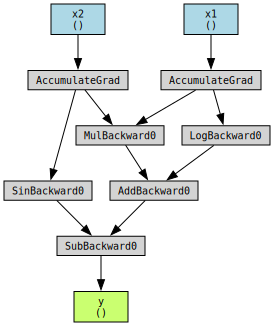

In [5]:
from torchviz import make_dot

make_dot(y, dict(x1 = x1, x2=x2, y = y))

### Example 2
What is the gradient of the function: 

$$y = 6x(1 −2x)^2$$

at $x = 2$ with respect to both $x$?

**Answer:**
First we create the input and output tensors. 

In [6]:
x = torch.tensor(2., requires_grad=True)
y = 6. * x * (1 - 2 * x)**2

Next we run the `backward()` function:

In [7]:
y.backward()

Here is $\frac{d y}{d x}$:

In [8]:
x.grad.item()

198.0

which is the same values as before. Here is the computational graph Autograd created for this function.

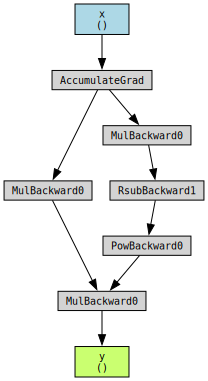

In [9]:
make_dot(y, dict(x = x, y = y))